In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [63]:
df = pd.read_csv('Mall_Customers.csv')

In [64]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [65]:
col_names = ['Age','Annual Income (k$)', 'Spending Score (1-100)']
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [66]:
newdf = scaled_features.join(df['Gender'])
newdf = pd.get_dummies(newdf)
newdf.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,0,1
1,-1.281035,-1.738999,1.195704,0,1
2,-1.352802,-1.700830,-1.715913,1,0
3,-1.137502,-1.700830,1.040418,1,0
4,-0.563369,-1.662660,-0.395980,1,0


In [67]:
newdf.drop(['Gender_Male'], axis = 1, inplace = True)

In [68]:
pca = PCA(n_components = 4)
principal_components = pca.fit_transform(newdf)
PCA_components = pd.DataFrame(principal_components)

([<matplotlib.axis.XTick at 0x7fc00f0cfdd0>,
 <a list of 4 Text major ticklabel objects>)

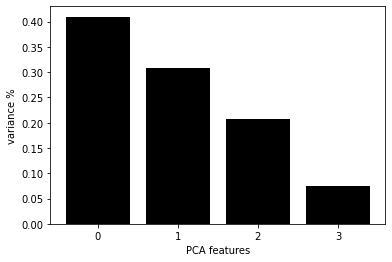

In [69]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

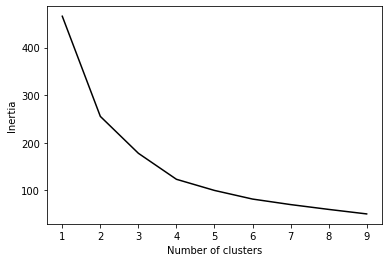

In [70]:
# we can see that the first two principal components explain 70% of our data variance
inertia = []
for cluster in range(1, 10):
  model = KMeans(n_clusters =cluster, init = 'k-means++')
  model.fit(PCA_components.iloc[:, :2])
  inertia.append(model.inertia_)

plt.plot(range(1, 10), inertia, color = 'black')  
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 10))
plt.show()

In [71]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(PCA_components.iloc[:, :2])
print(silhouette_score(PCA_components.iloc[:, :2], kmeans.labels_, metric = 'euclidean'))

0.4217762265394878


In [72]:
prediction = kmeans.predict(PCA_components.iloc[:, :2])
frame = df.drop(['CustomerID'], axis = 1)
frame['Cluster'] = prediction
frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,2
3,Female,23,16,77,0
4,Female,31,17,40,0


In [73]:
avg_df = frame.groupby(['Cluster'], as_index=False).mean()
avg_df.head()

,Cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,25.605263,32.631579,67.500000
1,1,41.685714,88.228571,17.285714
2,2,52.144928,46.333333,40.072464
3,3,30.000000,79.086207,70.775862


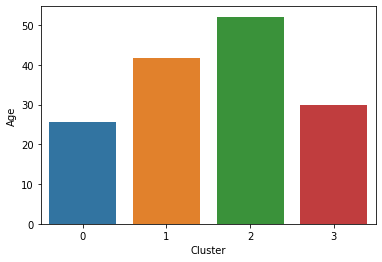

In [74]:
sns.barplot(x='Cluster',y='Age',data=avg_df)

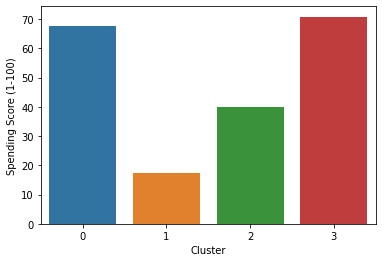

In [75]:
sns.barplot(x='Cluster',y='Spending Score (1-100)',data=avg_df)

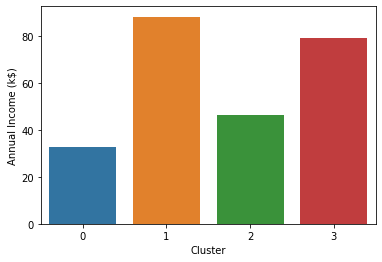

In [76]:
sns.barplot(x='Cluster',y='Annual Income (k$)',data=avg_df)

In [77]:
df2 = pd.DataFrame(frame.groupby(['Cluster','Gender'])['Gender'].count())
df2

Gender
Cluster Gender        
0       Female      23
        Male        15
1       Female      15
        Male        20
2       Female      40
        Male        29
3       Female      34
        Male        24

#***Conclusions***

###**Cluster 0** : The Careless Buyer
*   Low income, high spending score, average age of 20 and mostly females.

###**Cluster 1** : The Frugal Spender
*    Hight income, low spending score, average age of 40 and mostly males.

###**Cluster 2** : Almost Retired
*    Average income, average spending score, average age of 50 and mostly females.

###**Cluster 3** : Highly Affluent People
*    High income, high spending score, average age of 30 and mostly females.


